# 1. BACKGROUND

**Sunrise Supermarket, London, 2015.**

In early 2012, Sunrise Supermarket began implementing a new system to record customers’ demographic information, purchasing activities, campaign participation, complaints, and purchase channels. Initially, this system was designed primarily for bookkeeping and operational reporting. However, as the dataset grew richer over time, the London headquarters recognized its untapped potential and brought in a data analyst to explore and leverage the information for strategic decision-making.

In today’s data-driven business landscape, supermarkets increasingly rely on Customer Relationship Management (CRM) systems to collect and manage valuable customer information. This includes demographic profiles, purchasing behaviors, and responses to marketing campaigns. When analyzed effectively, CRM data can provide powerful insights into customer preferences, predict future behavior, and enable highly personalized marketing strategies.

Despite this potential, many organizations still underutilize their CRM data, relying on broad, one-size-fits-all marketing approaches that fail to capture the complexity of customer behavior. As competition grows and consumer expectations continue to evolve, using CRM data for customer segmentation and behavioral analysis is no longer optional — it is essential. Through segmentation, businesses can deliver more relevant customer experiences, strengthen loyalty, and improve marketing efficiency.

# 2.  PROBLEM STATEMENT

- **Low Marketing Campaign Engagement**
A `significant portion of customers did not accept any marketing campaign offers`. This low engagement rate reflects a misalignment between current marketing strategies and customer behavior, leading to ineffective promotional efforts and missed opportunities for growth.

- **Lack of Customer Segmentation Strategy**
Although the supermarket has access to sufficient CRM data, it `lacks a structured approach to segment customers based` on behavioral and demographic characteristics. Without proper segmentation, marketing initiatives remain broad and generic, limiting their impact and efficiency.

- **Inefficient Marketing Resource Allocation**
`Current marketing efforts target the entire customer base rather than focusing on high-potential segments`. This unfocused approach increases costs and dilutes campaign effectiveness, making it difficult for the supermarket to maximize return on investment and strengthen customer relationships.

`Using a CRM-driven approach, this project aims to analyze customer behavior over the past two years to formulate a more effective market strategy.` By leveraging CRM data, the supermarket will be able to better understand customer needs and preferences, enabling it to align products and marketing activities with specific customer segments. Through data-driven insights, the supermarket can deliver more targeted promotions, build stronger customer relationships, and increase marketing efficiency.

For example, rather than investing resources to promote a new product to the entire customer base, the supermarket can identify which customer segments are most likely to respond and focus its marketing efforts on those groups. This targeted CRM approach helps optimize marketing spend, increase campaign effectiveness, and strengthen customer engagement.

# 3. STAKEHOLDER

Marketing, Store Manager and Customer Service Teams of Sunrise Supermarket.

![ChatGPT Image Oct 16, 2025, 12_56_03 PM.png](<attachment:ChatGPT Image Oct 16, 2025, 12_56_03 PM.png>)

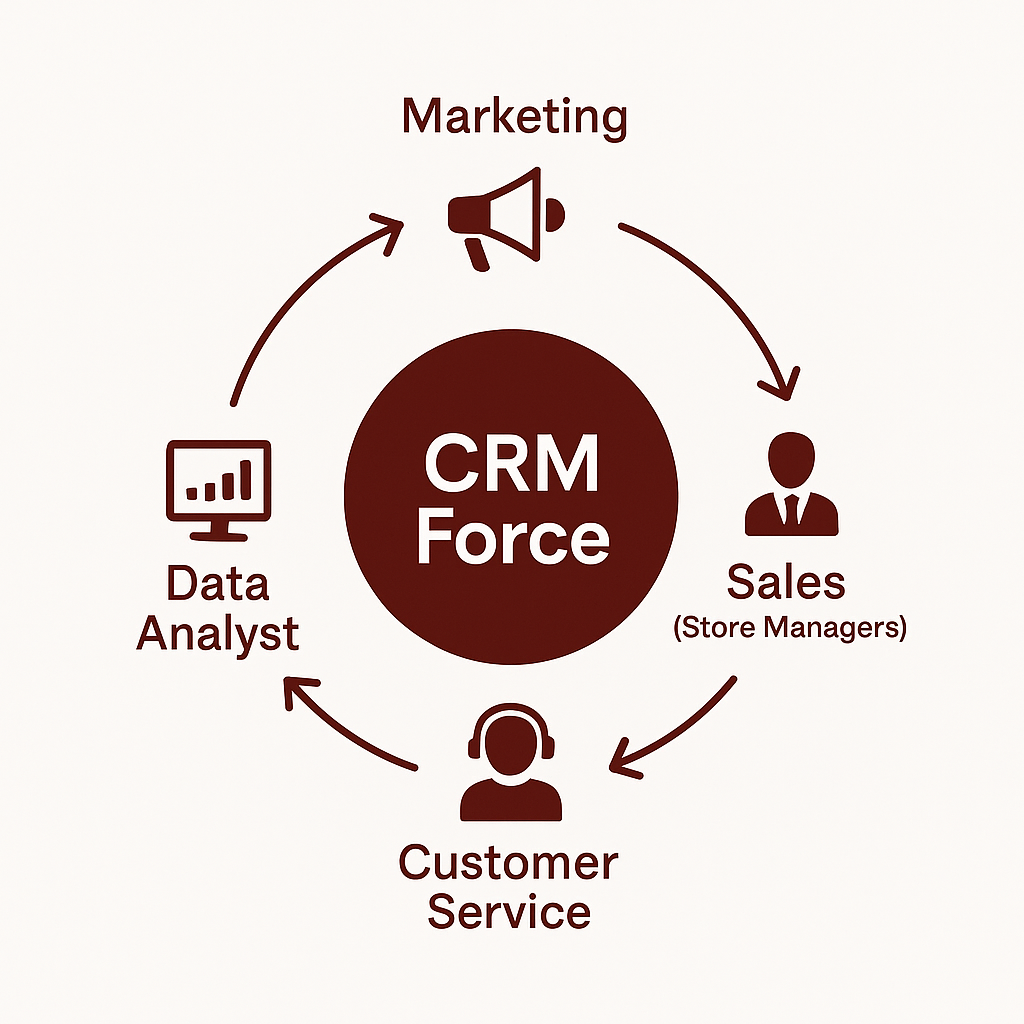

# 4.  DATA
To answer the research questions above, this study will analyze customer data collected through the supermarket’s Customer Relationship Management (CRM) system. The dataset contains detailed information on customer demographics, household composition, purchasing behavior across various product categories, and engagement through different shopping channels. [This data](https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=sharing) serves as the foundation for identifying distinct customer segments and uncovering behavioral patterns that can inform targeted marketing and customer relationship strategies.

There are *29* columns in the Supermarket Customers dataset, namely:

People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

Below are the first and last five rows of the Supermarket Customers dataset.

In [2]:
df = pd.read_csv('/Users/iffaulwani/Documents/Purwadhika/Materi/Supermarket Customers/Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# 4.1 Data Understanding 
In this section, we will identify and address various anomalies found in the Supermarket Customers dataset that need to be handled during the data cleaning stage. Each anomaly will be accompanied by a justification for the chosen handling method, supported by both domain knowledge and statistical reasoning.

As a starting point, let us first examine the age information derived from the Year_Birth column in the Supermarket Customers dataset. By converting the year of birth into an age variable, we can inspect potential outliers such as customers who appear to be unrealistically young or old, which may indicate data entry errors or inconsistencies.

### Data Type

In [3]:
print(f'The number of rows and columns in the dataset df is {df.shape}')
df.info()

The number of rows and columns in the dataset df is (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

### Data Structure

In [4]:
df.shape, df.columns

((2240, 29),
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
       dtype='object'))

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# MISSING VALUE
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

**Notes:** There is only 1% of missing data in the Income column of the dataset.

In [7]:
# DUPLICATED DATA
df[df.duplicated()].shape

(0, 29)

**Notes:** There's no duplication datas found in the dataset

In [8]:
# Use None (not -1) for unlimited column width
pd.set_option('display.max_colwidth', None)

# Build the summary table
rows = []
for col in df.columns:
    uniques = df[col].unique()
    sample = uniques[:15]  # cap to first 15 unique values for readability
    rows.append([col, df[col].nunique(), sample])

tabel1Desc = pd.DataFrame(
    rows,
    columns=['Column Name', 'Number of Unique', 'Unique Sample (up to 15)']
)
tabel1Desc

,Column Name,Number of Unique,Unique Sample (up to 15)
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006]"


**Summary:** 

- The dataset contains 2,240 rows and 29 columns.

- The year of birth of customers ranges from 1893 to 1996. It is unusual to find customers born in the 19th century, and this anomaly will be further investigated in the data cleaning process.

- Customer education levels range from Basic to PhD. To ensure consistency, this column will be normalized by grouping similar education categories to simplify analysis.

- Customer marital status includes overlapping categories such as Alone and Single, which carry the same meaning. These will be consolidated, while categories like Divorced and Widow will be grouped under Other.

- KidHome and TeenHome represent similar household attributes and will be merged into a single feature called “Dependents” to provide a clearer perspective on family structure.

- Customer enrollment dates range from July 2012 to June 2014, suggesting that the data was likely collected near the end of 2014 or the beginning of 2015.

- There are six product categories, which can be grouped into two main categories — Primary Goods and Secondary Goods — to streamline the analysis.

- Customers shop through three main channels: In-Store, Web, and Catalog.

- The dataset contains records of five initial marketing campaigns and one latest campaign (Response), but it does not provide the total number of campaigns held over the two-year period.

- The columns Z_CostContact and Z_Revenue are not explained in the data dictionary and contain only a single unique value. Since they provide no analytical value, these columns will be dropped.

- The Income column contains approximately 1% missing values. Given the minimal proportion and to simplify the cleaning process, rows with missing Income values will be dropped.



# 4.2 Data Preparation

### Renaming Columns

In [9]:
# Renaming Columns

df = df.rename(columns={
        'Marital_Status'        : 'Living_Status',
        'MntWines'              : 'Wine',
        'MntFruits'             : 'Fruit',
        'MntMeatProducts'       : 'Meat',
        'MntFishProducts'       : 'Fish',
        'MntSweetProducts'      : 'Sweet',
        'MntGoldProds'          : 'Gold',
        'NumDealsPurchases'     : 'Deals_Purchase',
        'NumWebPurchases'       : 'Web_Purchase',
        'NumCatalogPurchases'   : 'Catalog_Purchase',
        'NumStorePurchases'     : 'Store_Purchase',
        'NumWebVisitsMonth'     : 'Web_Visit_Month',
        'Response'              : 'Latest_Campaign',
        'AcceptedCmp1'          : 'Campaign1',
        'AcceptedCmp2'          : 'Campaign2',
        'AcceptedCmp3'          : 'Campaign3',
        'AcceptedCmp4'          : 'Campaign4',
        'AcceptedCmp5'          : 'Campaign5'
        })


### New Column Age 
The latest customer enrollment date was in 2014. Therefore, to calculate the customers’ age in a way that aligns with the dataset’s timeline, the reference year of 2015 will be used.

In [10]:
# Set the year of 2015
current_year = 2015

# Create a new column fof Age
df['Age'] = current_year - df['Year_Birth']


### Grouping Age
* <25 : Young customers
* 25–34 : Young adults
* 35–44 : Mid-aged adults
* 45–54 : Older adults
* 55–64 : Mature adults
* 65+ : Senior customers

In [11]:
def categorize_age(age):
    if age < 25:
        return '<25'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df['Age_Group'] = df['Age'].apply(categorize_age)

df['Age_Group'].value_counts().sort_index()
df[['Age', 'Age_Group']].head(10)

,Age,Age_Group
0,58,55-64
1,61,55-64
2,50,45-54
3,31,25-34
4,34,25-34
5,48,45-54
6,44,35-44
7,30,25-34
8,41,35-44
9,65,65+


### Categorizing Education Column

In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

**Note:** The education levels will be normalized into five standardized categories — High School, Diploma, Bachelor, Master, and PhD

In [13]:
df['Education'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    'PhD': 'PhD',
    'Master': "Master",
    'Basic': 'High School',
    '2n Cycle': 'Master',
    '2nd Cycle': 'Master',
    'Diploma': 'Diploma'
})

### Categorizing Living Status Column

In [14]:
df['Living_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

**Note:** The marital status categories will be standardized into three groups. Single and Widow will be categorized as Alone, since they typically represent individuals living without a partner. Absurd and YOLO will also be grouped under Alone due to their similar meaning. Married and Together will be categorized as Partnered, while Divorced will be placed in a separate Separated group.

In [15]:
df['Living_Status'] = df['Living_Status'].replace({
    'Single': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Absurd': 'Alone',
    'Married': 'Partnered',
    'Together': 'Partnered',
    'Divorced': 'Separated'
})

### New Column Parental_Status, Dependants, and Family_Size

In [16]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']
df['Parental_Status'] = np.where(df['Dependents'] > 0, 'Parent', 'Not Parent')
df['Family_Size'] = (
    df['Living_Status'].replace({'Alone': 1, 'Partnered': 2, 'Separated': 1})
    + df['Dependents']
)

**Note:** 
* Dependents = number of kids/teens in the household
* Parental_Status = whether the person has dependents
* Family_Size = total people in the household (adult(s) + dependents)

### New Column Total_Spent and Total_Purchase

In [17]:
df['Total_Spent'] = df['Wine'] + df['Fruit'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']
df['Total_Purchase'] = df['Web_Purchase'] + df['Catalog_Purchase'] + df['Store_Purchase']

**Note:** 
* The Total_Spent column represents the total amount spent by each customer across all product categories in the supermarket.
* The Total_Purchases column represents the total number of purchases made by each customer through all available shopping channels (In-Store, Web, and Catalog).

### New Column Total `Accepted_Campaign`

In [18]:
df['Accepted_Canmpaign'] = df['Campaign1'] + df['Campaign2'] + df['Campaign3'] + df['Campaign4'] + df['Campaign5'] + df['Latest_Campaign']

**Note:** The `Acceptep_Campaign` column was created to summarize whether a customer has ever accepted any marketing campaign, consolidating multiple campaign response columns into a single indicator.

### New Column `Income_Category`

In [19]:
# Define the income bins and labels
income_bins = [0, 30000, 60000, 90000, float('inf')]  
income_labels = ['Low', 'Mid', 'High', 'Very High']

# Create a new column with categorized income
df['Income_Category'] = pd.cut(df['Income'], 
                               bins=income_bins, 
                               labels=income_labels, 
                               right=False)

# Check distribution
df['Income_Category'].value_counts()

Income_Category
Mid          1004
High          788
Low           370
Very High      54
Name: count, dtype: int64

**Note:**
* bins=[0, 30000, 60000, 90000, inf] -> splits income into 4 ranges:
* 0–29,999 : Low
* 30,000–59,999 : Mid
* 60,000–89,999 : High
* 90,000+ : Very High
* Right=False : makes the interval left-inclusive, i.e. [0, 30000) includes 0 but not 30000.
* pd.cut() : assigns each income into one of those bins.

### Drop Missing Values and Unneeded Column

In [20]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Living_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Deals_Purchase', 'Web_Purchase', 'Catalog_Purchase',
       'Store_Purchase', 'Web_Visit_Month', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Latest_Campaign', 'Age', 'Age_Group', 'Dependents',
       'Parental_Status', 'Family_Size', 'Total_Spent', 'Total_Purchase',
       'Accepted_Canmpaign', 'Income_Category'],
      dtype='object')

In [21]:
print(df['Income'].isna().sum())

24


In [23]:
df = df.dropna(subset=['Income'])

**Note:** Rows with missing values in the Income column were dropped because they only make up 1% of the data, so removing them won’t affect the analysis.

In [24]:
df = df.drop(columns=[
          'Kidhome', 
          'Teenhome', 
          'Z_CostContact', 
          'Z_Revenue', 
])

In [25]:
df.head()

,ID,Year_Birth,Education,Living_Status,Income,Dt_Customer,Recency,Wine,Fruit,Meat,...,Latest_Campaign,Age,Age_Group,Dependents,Parental_Status,Family_Size,Total_Spent,Total_Purchase,Accepted_Canmpaign,Income_Category
0,5524,1957,Bachelor,Alone,58138.0,04-09-2012,58,635,88,546,...,1,58,55-64,0,Not Parent,1,1617,22,1,Mid
1,2174,1954,Bachelor,Alone,46344.0,08-03-2014,38,11,1,6,...,0,61,55-64,2,Parent,3,27,4,0,Mid
2,4141,1965,Bachelor,Partnered,71613.0,21-08-2013,26,426,49,127,...,0,50,45-54,0,Not Parent,2,776,20,0,High
3,6182,1984,Bachelor,Partnered,26646.0,10-02-2014,26,11,4,20,...,0,31,25-34,1,Parent,3,53,6,0,Low
4,5324,1981,PhD,Partnered,58293.0,19-01-2014,94,173,43,118,...,0,34,25-34,1,Parent,3,422,14,0,Mid


### Outlier Handling

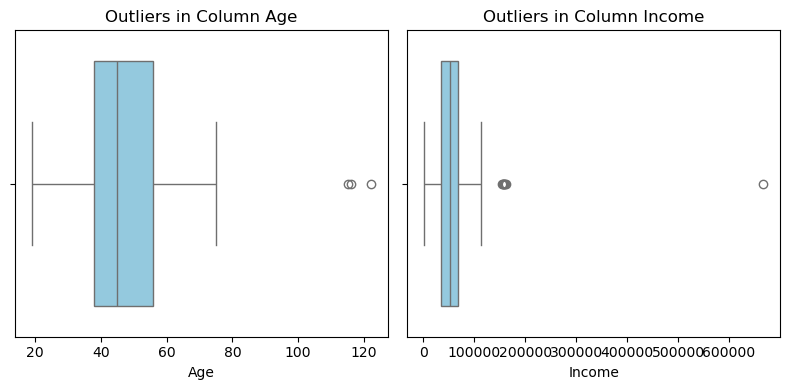

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(x=df['Age'], ax=ax1, color='skyblue')
ax1.set_title('Outliers in Column Age')

sns.boxplot(x=df['Income'], ax=ax2, color='skyblue')
ax2.set_title('Outliers in Column Income')

plt.tight_layout()

In [27]:
# 1. Calculate Q1, Q3, and IQR for Age and Income
Q1 = df[['Age', 'Income']].quantile(0.25)
Q3 = df[['Age', 'Income']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Cap outliers
df['Age'] = np.where(df['Age'] < lower_bound['Age'], lower_bound['Age'],
             np.where(df['Age'] > upper_bound['Age'], upper_bound['Age'], df['Age']))

df['Income'] = np.where(df['Income'] < lower_bound['Income'], lower_bound['Income'],
             np.where(df['Income'] > upper_bound['Income'], upper_bound['Income'], df['Income']))

print("Age min:", df['Age'].min(), "| Age max:", df['Age'].max())
print("Income min:", df['Income'].min(), "| Income max:", df['Income'].max())

Age min: 19.0 | Age max: 83.0
Income min: 1730.0 | Income max: 118350.5


In [28]:
# 3. Remove rows outside bounds after capping 
df = df[
    (df['Age'] >= lower_bound['Age']) & (df['Age'] <= upper_bound['Age']) &
    (df['Income'] >= lower_bound['Income']) & (df['Income'] <= upper_bound['Income'])
].reset_index(drop=True)

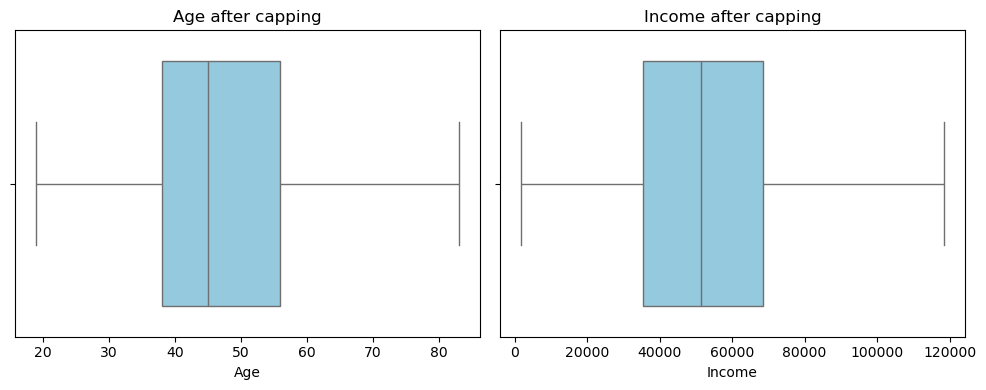

In [29]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

sns.boxplot(x=df['Age'], ax=ax1, color='skyblue')
ax1.set_title('Age after capping')

sns.boxplot(x=df['Income'], ax=ax2, color='skyblue')
ax2.set_title('Income after capping')

plt.tight_layout()
plt.show()

**Summary:**
Boxplot analysis was conducted on the `Age` and `Income` columns to identify extreme values. Several outliers were detected, particularly on the Income variable, indicating the presence of customers with unusually high income compared to the majority of the population.

To address this, *the IQR (Interquartile Range)* method was applied to calculate the lower and upper bounds for both columns.
Any values below the lower bound or above the upper bound were capped to the nearest threshold. This ensures that the extreme values do not disproportionately influence the analysis, while still retaining all observations.

After capping, the data distribution was visualized again using boxplots. The results show that outliers have been successfully reduced to fall within a more reasonable range. Finally, any rows that still fell outside the valid bounds (if any) were removed to ensure data consistency.

This step improves data quality, reduces skewness, and ensures that further analysis (such as segmentation and modeling) is more robust and representative of the overall customer population.

### Cleaned Data

In [30]:
listItem = []
for col in df.columns:
    s = df[col]
    dtype = s.dtype
    nulls = s.isna().sum()
    uniq_count = s.nunique(dropna=True)
    unique_sample = pd.Series(s.dropna().astype(str).unique()).head(2).tolist()
    listItem.append([col, dtype, nulls, uniq_count, unique_sample])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample']
)

print(df.shape)
dfDesc

(2216, 34)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2216,"[5524, 2174]"
1,Year_Birth,int64,0,59,"[1957, 1954]"
2,Education,object,0,4,"[Bachelor, PhD]"
3,Living_Status,object,0,3,"[Alone, Partnered]"
4,Income,float64,0,1967,"[58138.0, 46344.0]"
5,Dt_Customer,object,0,662,"[04-09-2012, 08-03-2014]"
6,Recency,int64,0,100,"[58, 38]"
7,Wine,int64,0,776,"[635, 11]"
8,Fruit,int64,0,158,"[88, 1]"
9,Meat,int64,0,554,"[546, 6]"


## 4.3 Exporting the Clean Dataset for Visualization in Looker Studio

In [59]:
#Export DataFrame ke file Excel
df.to_excel('/Users/iffaulwani/Documents/Purwadhika/Materi/Supermarket Customers/supermarket_clean.xlsx', index=False)

# 5.  DATA ANALYSIS

Checking the data distribution among data frame

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Wine'}>],
       [<Axes: title={'center': 'Fruit'}>,
        <Axes: title={'center': 'Meat'}>,
        <Axes: title={'center': 'Fish'}>,
        <Axes: title={'center': 'Sweet'}>,
        <Axes: title={'center': 'Gold'}>],
       [<Axes: title={'center': 'Deals_Purchase'}>,
        <Axes: title={'center': 'Web_Purchase'}>,
        <Axes: title={'center': 'Catalog_Purchase'}>,
        <Axes: title={'center': 'Store_Purchase'}>,
        <Axes: title={'center': 'Web_Visit_Month'}>],
       [<Axes: title={'center': 'Campaign3'}>,
        <Axes: title={'center': 'Campaign4'}>,
        <Axes: title={'center': 'Campaign5'}>,
        <Axes: title={'center': 'Campaign1'}>,
        <Axes: title={'center': 'Campaign2'}>],
       [<Axes: title={'center': 'Complain'}>,
        <Axes: title={'

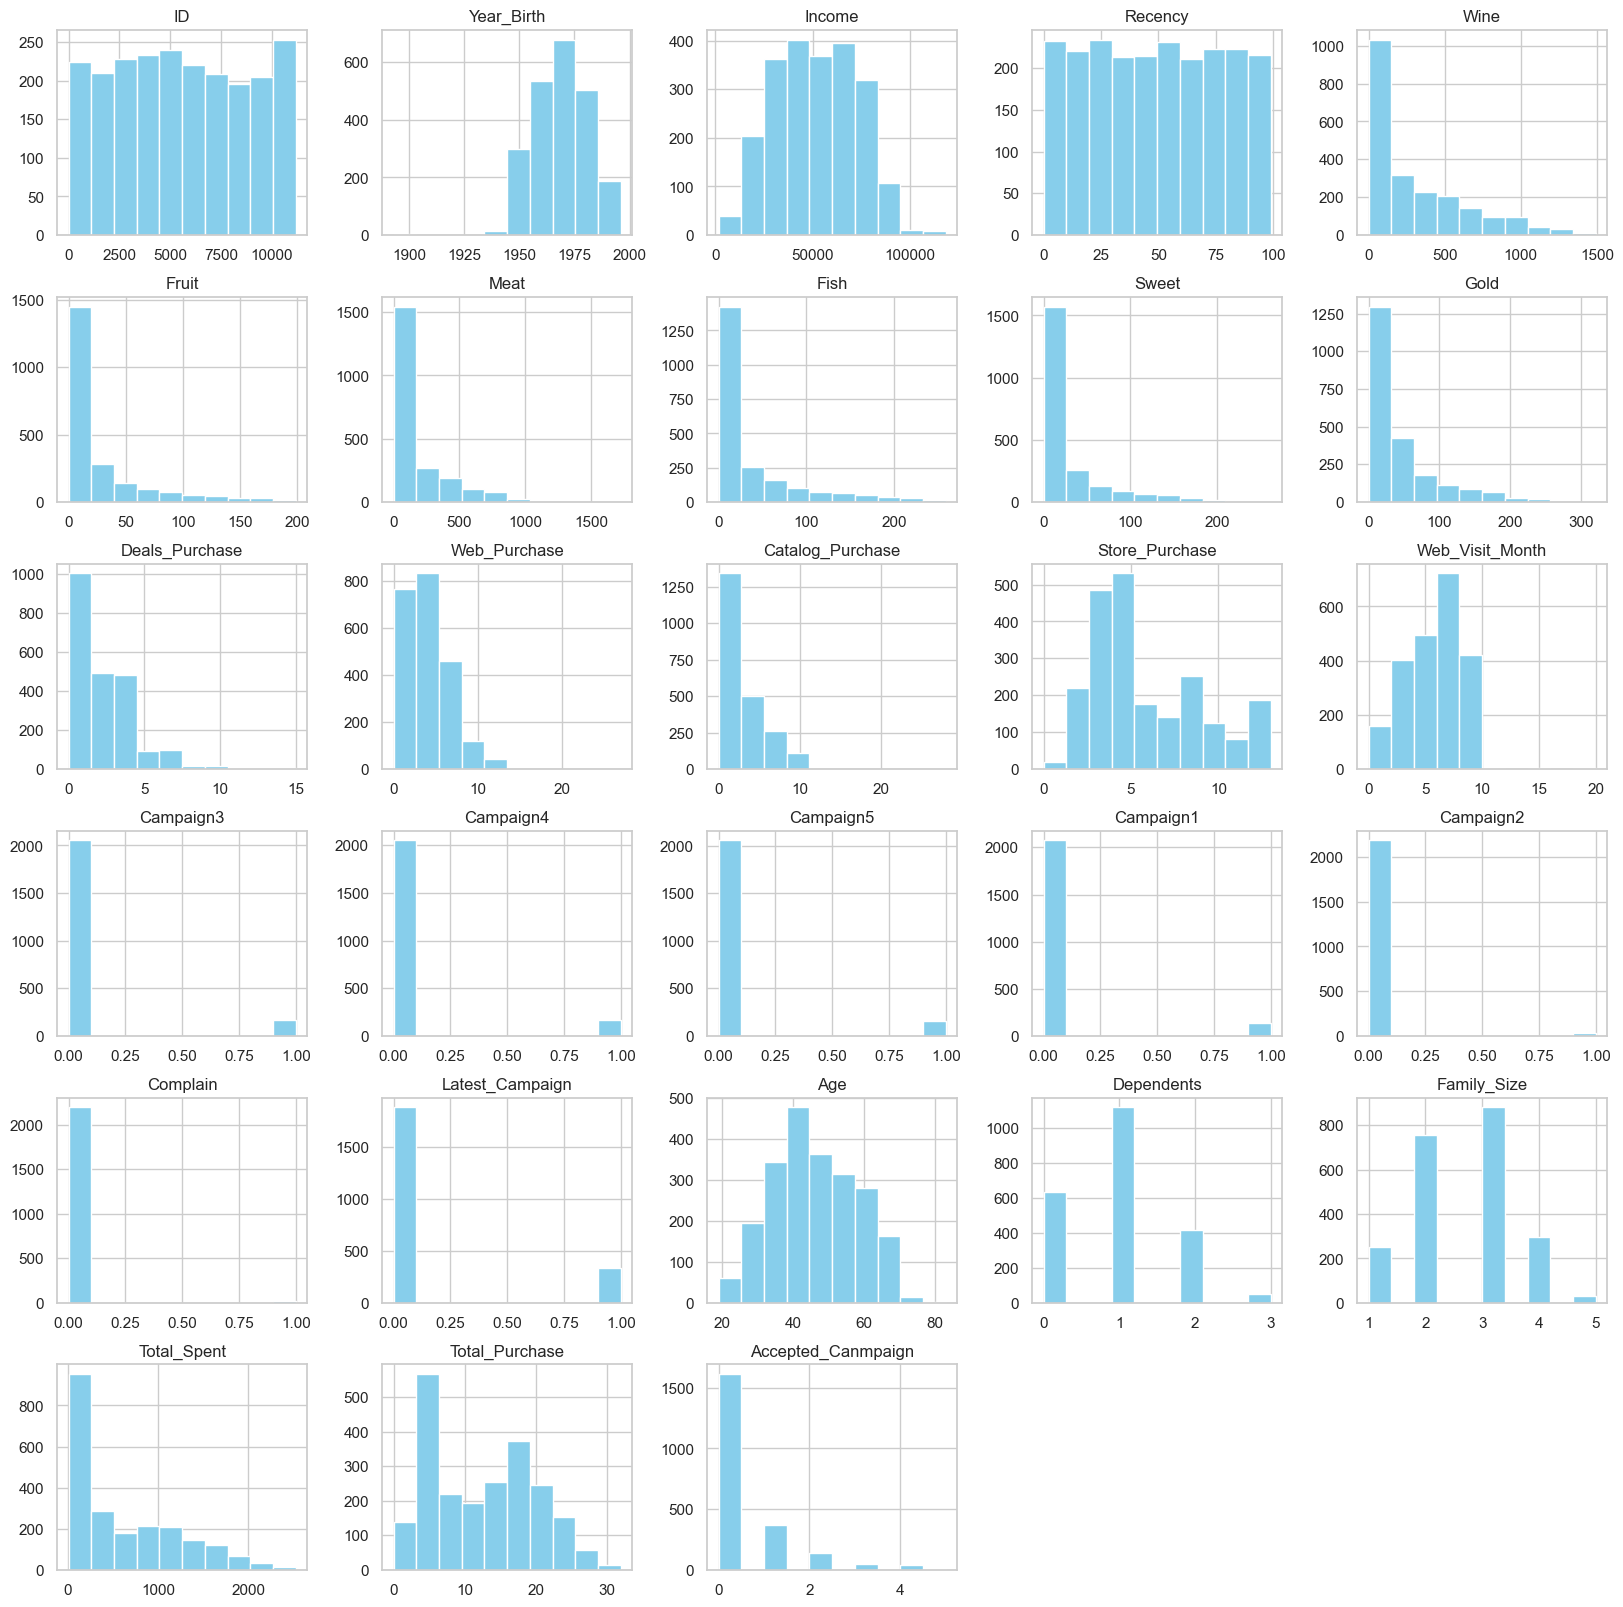

In [62]:
df.hist(figsize=(20,20), color='skyblue')

**Note:** The histogram visualization reveals that most numeric variables — especially spending categories and income — are right-skewed, meaning a small number of customers contribute a large share of total spending.

Because of this skewness, the median will be used as a more reliable measure of central tendency than the mean, as it better represents the typical customer without being affected by extreme high spenders. This will help produce a more balanced and realistic analysis of customer behavior.

## 5.1 Customer's Spending and Favorites

In [200]:
# Make sure Total_Spent is numeric
df['Total_Spent'] = pd.to_numeric(df['Total_Spent'], errors='coerce').fillna(0)

# Median spending by Age Group
median_age = df.groupby('Age_Group')['Total_Spent'].median().sort_values(ascending=False)

# Median spending by Family Size
median_family = df.groupby('Family_Size')['Total_Spent'].median().sort_values(ascending=False)

# Median spending by Income Category
median_income = df.groupby('Income_Category')['Total_Spent'].median().sort_values(ascending=False)

print(median_age)
print(median_family)
print(median_income)

Age_Group
<25      961.0
65+      874.0
55-64    587.0
45-54    465.5
35-44    231.0
25-34    147.0
Name: Total_Spent, dtype: float64
Family_Size
1    1188.5
2     746.0
3     239.0
4      91.5
5      88.0
Name: Total_Spent, dtype: float64
Income_Category
Very High    1720.5
High         1160.0
Mid           179.0
Low            49.0
Name: Total_Spent, dtype: float64


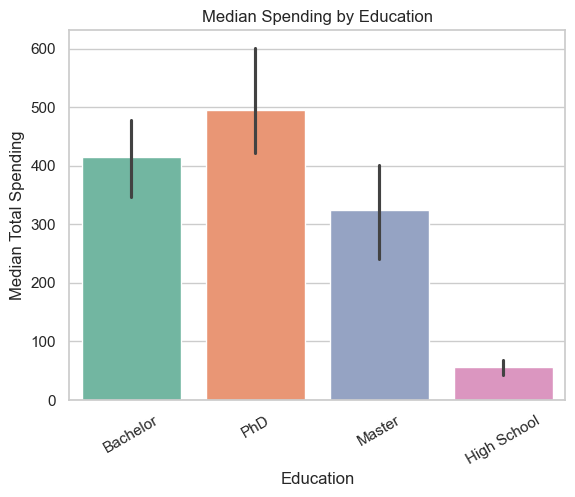

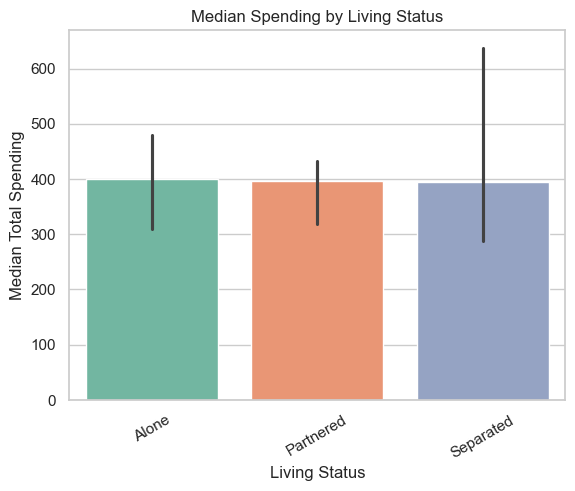

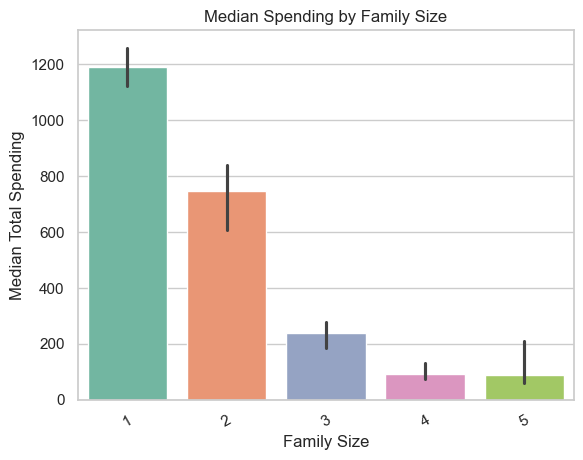

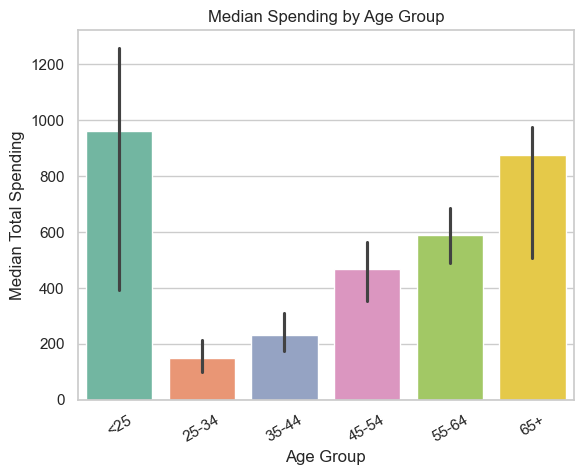

In [68]:
sns.set(style="whitegrid")

# Spending by Education
sns.barplot(data=df, x='Education', y='Total_Spent', estimator='median', palette='Set2')
plt.title('Median Spending by Education')
plt.xlabel('Education')
plt.ylabel('Median Total Spending')
plt.xticks(rotation=30)
plt.show()

# Spending by Living Status
sns.barplot(data=df, x='Living_Status', y='Total_Spent', estimator='median', palette='Set2')
plt.title('Median Spending by Living Status')
plt.xlabel('Living Status')
plt.ylabel('Median Total Spending')
plt.xticks(rotation=30)
plt.show()

# Spending by Family Size
sns.barplot(data=df, x='Family_Size', y='Total_Spent', estimator='median', palette='Set2')
plt.title('Median Spending by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Median Total Spending')
plt.xticks(rotation=30)
plt.show()

# Spending by Age_Group
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

sns.barplot(
    data=df,
    x='Age_Group',
    y='Total_Spent',
    estimator='median',
    palette='Set2',
    order=age_order
)
plt.title('Median Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Total Spending')
plt.xticks(rotation=30)
plt.show()

**Summary:**

* Overall, demographic factors play a significant role in shaping customer spending behavior at Sunrise Supermarket. Across living status, the median spending appears relatively similar, but deeper patterns emerge within segments.

* Customers living in larger households or with family show higher median spending overall — likely driven by bigger basket sizes and shared consumption. Interestingly, single-person households record the highest median spending per individual, while families with three or more members contribute significantly to total spending, making them a strong target for family bundles or promotional campaigns.

* Spending is highest among the <25 age group, followed by senior customers aged 65+, reflecting both productive earning years and stable income segments. Additionally, customers with a Bachelor’s degree or higher show the highest median spending, suggesting an alignment between education level, income, and preference for premium products.

* These patterns highlight the importance of demographic segmentation in CRM strategies. By targeting key segments — families, young to middle-aged, and high-education customers — with tailored promotions, premium offerings, and lifestyle-driven campaigns, Sunrise can boost engagement, increase conversion, and maximize revenue potential.



In [202]:
# Make sure Total_Purchase is numeric
df['Total_Purchase'] = pd.to_numeric(df['Total_Purchase'], errors='coerce').fillna(0)

# Median purchase by Age Group
median_purchase_age = df.groupby('Age_Group')['Total_Purchase'].median().sort_values(ascending=False)

# Median purchase by Family Size
median_purchase_family = df.groupby('Family_Size')['Total_Purchase'].median().sort_values(ascending=False)

# Median purchase by Income Category
median_purchase_income = df.groupby('Income_Category')['Total_Purchase'].median().sort_values(ascending=False)

print(median_purchase_age)
print(median_purchase_family)
print(median_purchase_income)

Age_Group
<25      17.0
65+      16.0
55-64    15.0
45-54    13.0
35-44    10.0
25-34     7.0
Name: Total_Purchase, dtype: float64
Family_Size
1    17.5
2    15.0
3    10.0
4     6.0
5     6.0
Name: Total_Purchase, dtype: float64
Income_Category
Very High    20.5
High         19.0
Mid           8.0
Low           5.0
Name: Total_Purchase, dtype: float64


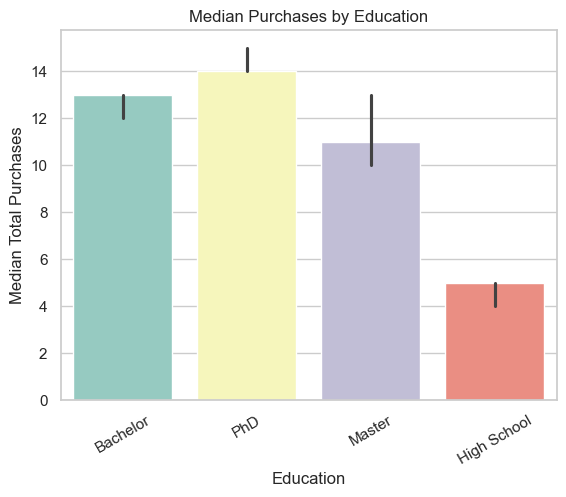

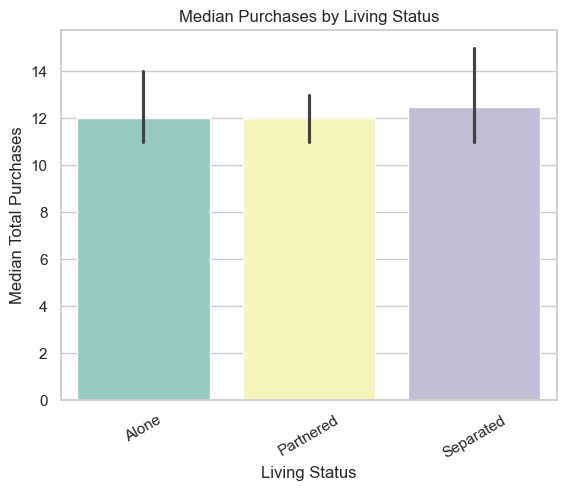

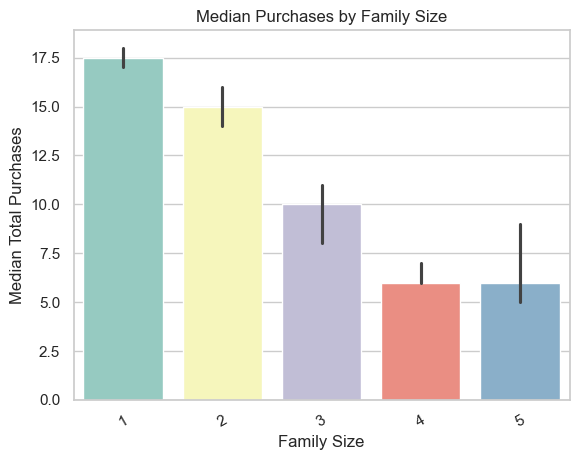

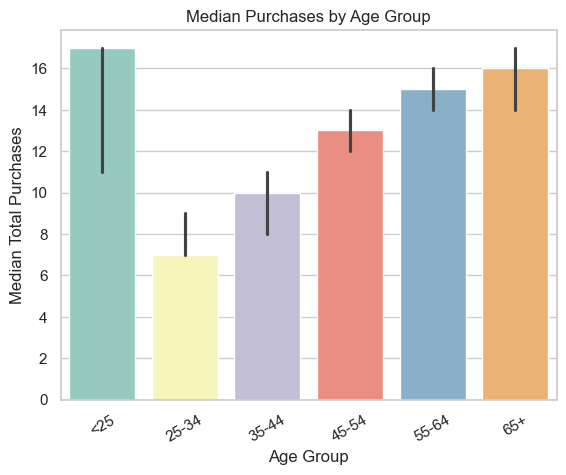

In [ ]:
sns.set(style="whitegrid")

# Purchases by Education
sns.barplot(data=df, x='Education', y='Total_Purchase', estimator='median', palette='Set3')
plt.title('Median Purchases by Education')
plt.xlabel('Education')
plt.ylabel('Median Total Purchases')
plt.xticks(rotation=30)
plt.show()

# Purchases by Living Status
sns.barplot(data=df, x='Living_Status', y='Total_Purchase', estimator='median', palette='Set3')
plt.title('Median Purchases by Living Status')
plt.xlabel('Living Status')
plt.ylabel('Median Total Purchases')
plt.xticks(rotation=30)
plt.show()

# Purchases by Family Size
sns.barplot(data=df, x='Family_Size', y='Total_Purchase', estimator='median', palette='Set3')
plt.title('Median Purchases by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Median Total Purchases')
plt.xticks(rotation=30)
plt.show()

# Purchases by Age Group
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

sns.barplot(
    data=df,
    x='Age_Group',
    y='Total_Purchase',
    estimator='median',
    palette='Set3',
    order=age_order
)
plt.title('Median Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Total Purchases')
plt.xticks(rotation=30)
plt.show()


**Summary:**
* Overall, demographic factors also play a significant role in shaping purchase frequency at Sunrise Supermarket. Across living status, customers show similar purchase intent, with more subtle differences emerging across segments.

* Customers with higher education tend to purchase more frequently, aligning with their greater spending power and preference for regular or premium shopping patterns. While purchase frequency is fairly consistent across living statuses, customers living in larger households or with families contribute more to total purchase volume overall. Interestingly, single-person households record a higher individual proportion within household segments, indicating stronger per-customer purchase behavior.

* Median purchase frequency increases with family size, reinforcing the importance of households as a key segment for bundle promotions and loyalty programs that reward frequent shopping.

* Just like spending behavior, it’s interesting to note that younger customers make up a larger share of purchases, while frequency grows exponentially across age groups from 25 to 65. 

* These patterns highlight the importance of demographic segmentation in CRM strategies. By targeting families, middle-aged customers, and highly educated segments with tailored promotions, bundles, and loyalty programs, Sunrise can increase visit frequency, boost engagement, and drive sustainable revenue growth.

## 5.2 Correlation between Categories

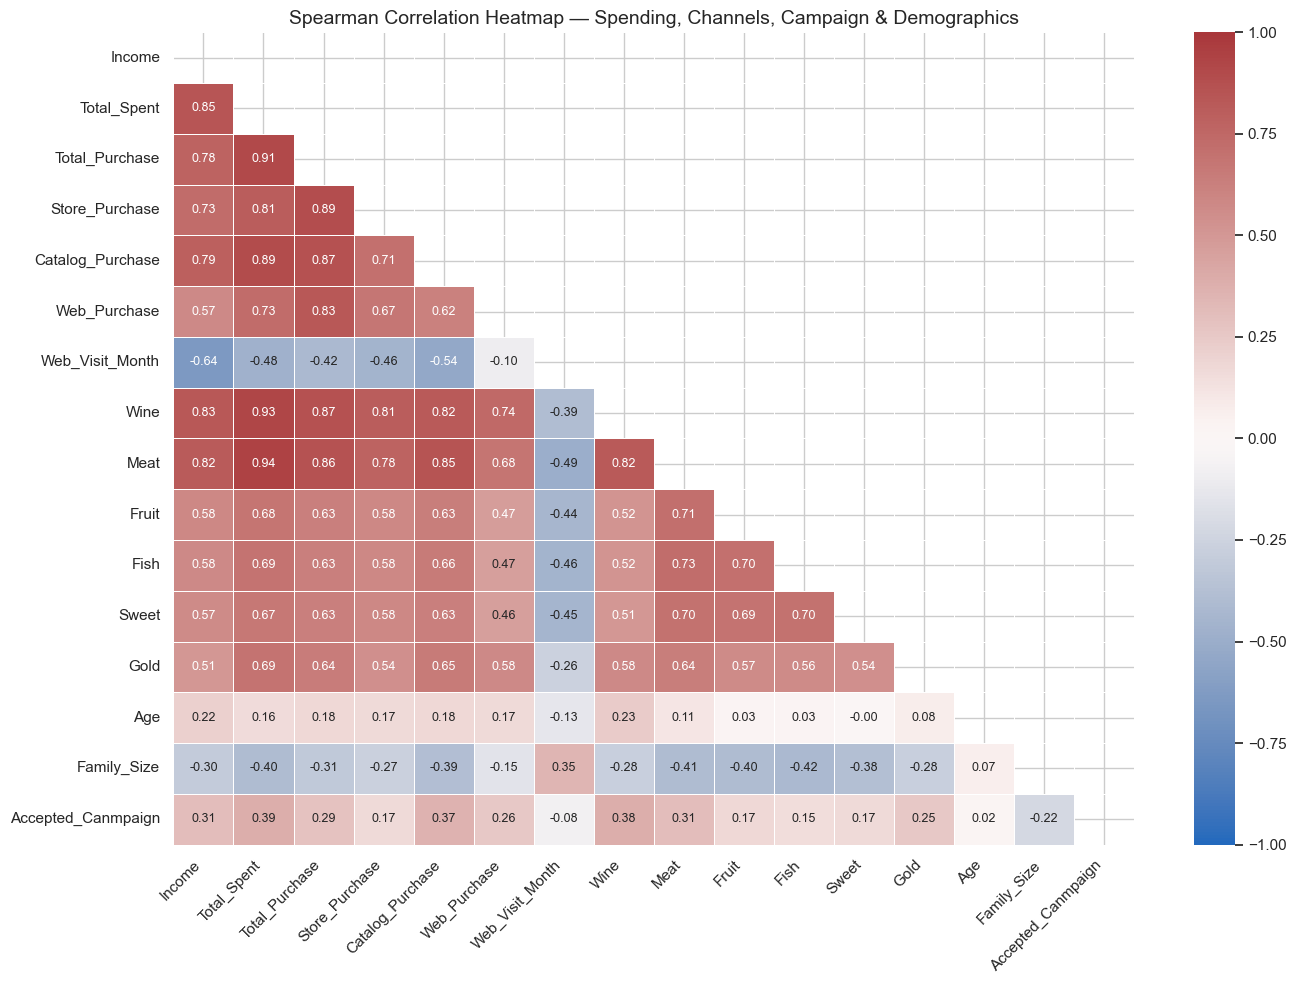

In [122]:
# 1. Calculate Spearman correlation
correlation = df[['Income', 'Total_Spent', 'Total_Purchase', 
                  'Store_Purchase', 'Catalog_Purchase', 'Web_Purchase',
                  'Web_Visit_Month', 'Wine', 'Meat', 'Fruit', 'Fish', 
                  'Sweet', 'Gold', 'Age', 'Family_Size', 
                  'Accepted_Canmpaign']].corr(method='spearman')

# 2. Create mask for upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# 3. Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation,
    mask=mask,
    cmap='vlag',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot_kws={'size': 9}
)
plt.title('Spearman Correlation Heatmap — Spending, Channels, Campaign & Demographics', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Note:**

* The correlation heatmap shows strong positive relationships between Total Spending, Total Purchases, and Wine/Meat/Gold spending, indicating that high overall spending is driven by these premium product categories.

* There’s also a noticeable link between Income and Total Spending, suggesting that higher-income customers tend to spend more. Web visits show a weaker correlation with total purchase, which may indicate browsing does not always lead to conversion.

* Meanwhile, campaign acceptance has relatively low correlations with most variables, implying that current promotional efforts may not strongly influence purchasing behavior. This insight highlights an opportunity to optimize campaigns and targeting strategies to improve engagement.

## 5.3 Campaign Acceptance VS Dominant Channel

In [67]:
total_customer = len(df)
accepted_customer = (df['Accepted_Canmpaign'] > 0).sum()
not_accepted_customer = (df['Accepted_Canmpaign'] == 0).sum()

acceptance_rate = accepted_customer / total_customer * 100
not_acceptance_rate = not_accepted_customer / total_customer * 100

print(f"Total customers: {total_customer}")
print(f"Accepted at least one campaign: {accepted_customer} ({acceptance_rate:.2f}%)")
print(f"Did not accept any campaign: {not_accepted_customer} ({not_acceptance_rate:.2f}%)")



Total customers: 2216
Accepted at least one campaign: 605 (27.30%)
Did not accept any campaign: 1611 (72.70%)


In [195]:
campaign_cols = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Latest_Campaign']
# Make sure columns are numeric
df[campaign_cols] = df[campaign_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Sum each column to get total accepted
campaign_acceptance = df[campaign_cols].sum().sort_values(ascending=False)

campaign_acceptance

Latest_Campaign    333
Campaign4          164
Campaign3          163
Campaign5          162
Campaign1          142
Campaign2           30
dtype: int64

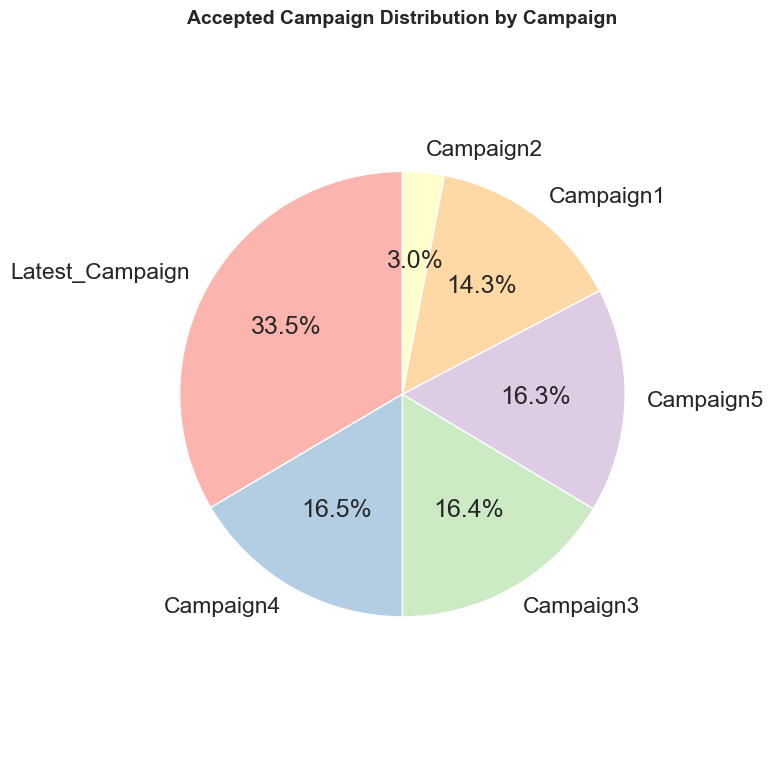

In [196]:
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    campaign_acceptance.values,
    labels=campaign_acceptance.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Accepted Campaign Distribution by Campaign', fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

Latest_Campaign    333
Campaign4          164
Campaign3          163
Campaign5          162
Campaign1          142
Campaign2           30

**Note:**

The distribution of accepted campaigns shows that most customers have not accepted any marketing campaign (~72%), indicating low overall engagement. A smaller portion of customers accepted only one or two campaigns, while very few participated in more than that.

This pattern highlights that campaign effectiveness is currently limited to a narrow segment of the customer base. It suggests that existing promotional strategies may not be fully aligned with customer preferences or needs.

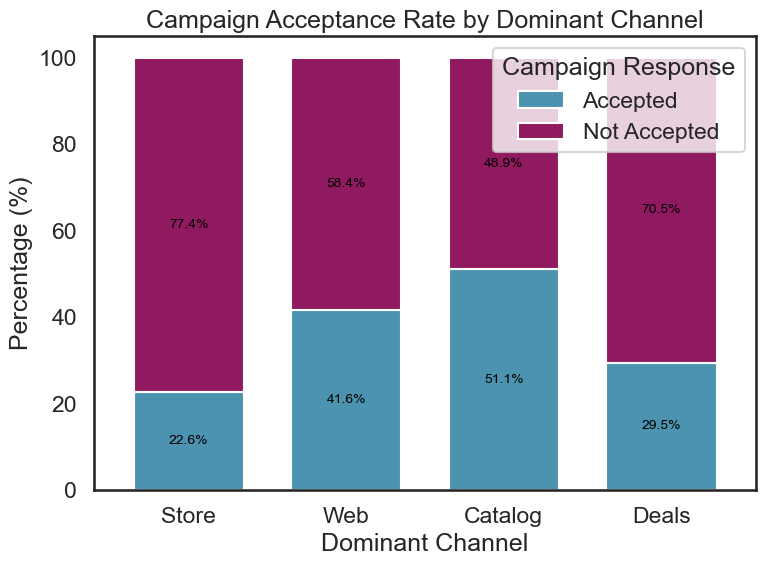

In [140]:
# Create Dominant_Channel based on the highest number of purchases
channel_cols = ['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase', 'Deals_Purchase']

# make sure they are numeric
df[channel_cols] = df[channel_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# find which channel has the highest purchase for each customer
df['Dominant_Channel'] = df[channel_cols].idxmax(axis=1)

# replace column names with clean labels
df['Dominant_Channel'] = df['Dominant_Channel'].replace({
    'Store_Purchase': 'Store',
    'Web_Purchase': 'Web',
    'Catalog_Purchase': 'Catalog',
    'Deals_Purchase' : 'Deals'
})

# Create Campaign_Flag (1 if accepted any campaign, else 0)
campaign_cols = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Latest_Campaign']
df[campaign_cols] = df[campaign_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Campaign_Flag'] = (df[campaign_cols].sum(axis=1) > 0).astype(int)

# Crosstab for percentage accepted vs not accepted per channel
channel_acceptance = (
    pd.crosstab(df['Dominant_Channel'], df['Campaign_Flag'], normalize='index') * 100
).rename(columns={1: 'Accepted', 0: 'Not Accepted'})


for col in ['Accepted', 'Not Accepted']:
    if col not in channel_acceptance.columns:
        channel_acceptance[col] = 0.0

# sort channel order
order = [c for c in ['Store', 'Web', 'Catalog', 'Deals'] if c in channel_acceptance.index]
if order:
    channel_acceptance = channel_acceptance.reindex(order)

# Plot stacked bar
ax = channel_acceptance[['Accepted','Not Accepted']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    color=["#4C93AF", "#901A5F"],  # green accepted, yellow not accepted
    width=0.7
)

plt.title('Campaign Acceptance Rate by Dominant Channel')
plt.xlabel('Dominant Channel')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Campaign Response', loc='upper right')

# 5) Add percentage labels inside the bars
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(f'{h:.1f}%',
                    (p.get_x() + p.get_width()/2, p.get_y() + h/2),
                    ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Note:**

The stacked bar chart shows a clear difference in campaign engagement across channels. Store and Web channels have higher acceptance rates compared to Catalog and Deals, which have noticeably lower participation.

Most customers who engage with campaigns are in-store or online shoppers, indicating that these channels are more effective touchpoints for marketing efforts. Catalog and Deals, on the other hand, may require better targeting or different messaging to increase response rates.

In [141]:
# Total web visits & purchases
total_web_visit = df['Web_Visit_Month'].sum()
total_web_purchase = df['Web_Purchase'].sum()

# Hitung conversion rate
web_conversion_rate = (total_web_purchase / total_web_visit) * 100

print(f"Total Web Visits     : {total_web_visit}")
print(f"Total Web Purchases  : {total_web_purchase}")
print(f"Web Conversion Rate  : {web_conversion_rate:.2f}%")

Total Web Visits     : 11787
Total Web Purchases  : 9053
Web Conversion Rate  : 76.80%


In [120]:
total_visit = df['Web_Visit_Month'].sum()
total_purchase = df['Web_Purchase'].sum()
conversion_rate = (total_purchase / total_visit) * 100

fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            xref='paper',
            yref='paper',
            text=f'Conversion Rate: {conversion_rate:.2f}%',
            showarrow=False,
            font=dict(size=14, color='skyblue')
        )
    ]
)

**Note:**

The funnel chart confirms earlier findings that Web is the top channel in terms of customer activity. It not only attracts the highest number of visits but also delivers a solid conversion rate, indicating that a meaningful share of web visitors successfully complete their purchases.

This performance highlights the Web channel as a critical revenue driver. With strong traffic and conversion already in place, further optimizing the online experience—such as improving checkout flow, personalizing offers, and refining campaigns—can help unlock even greater sales potential.

## 5.4 Favourite Products and Channel

In [107]:
product_cols = ["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"]

# Best-selling category (by total spend)
totals = df[product_cols].sum().sort_values(ascending=False)
best_category = totals.idxmax()
best_value = totals.max()

print("Best-selling category:", best_category)
print("Total spend:", best_value)
print("\nRanking:\n", totals)

Best-selling category: Wine
Total spend: 676083

Ranking:
 Wine     676083
Meat     370063
Gold      97427
Fish      83405
Sweet     59896
Fruit     58405
dtype: int64


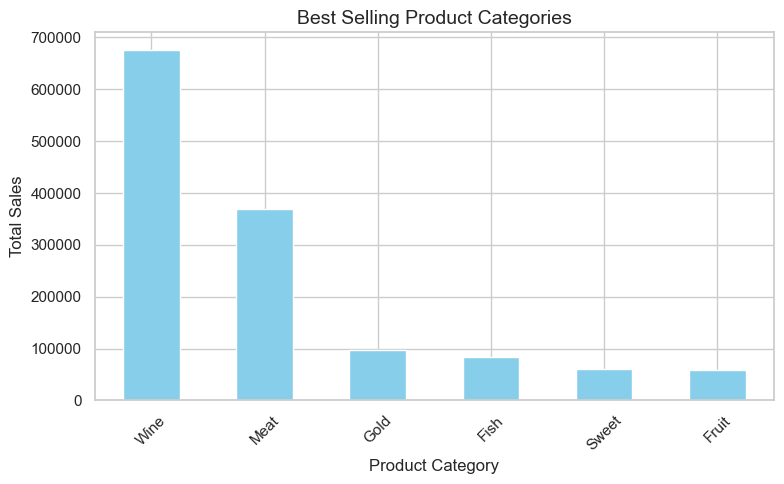

In [94]:
# Calculate total sales per product category
totals = df[product_cols].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
totals.plot(kind='bar', color='skyblue')
plt.title('Best Selling Product Categories', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Note:**

The bar chart shows that Wine, Meat, and Gold are the top three product categories in terms of total sales. These categories dominate revenue, reflecting their higher price points compared to others like Fruit, Fish, and Sweet.

This indicates that premium products drive the majority of sales, with Wine leading significantly. These insights can help prioritize inventory planning, pricing strategies, and promotional focus on high-margin categories.

In [204]:
# Define channel columns
channel_cols = ["Web_Purchase", "Catalog_Purchase", "Store_Purchase", "Deals_Purchase"]

# Calculate total transactions per channel
channel_totals = df[channel_cols].sum().sort_values(ascending=False)
channel_totals

Store_Purchase      12855
Web_Purchase         9053
Catalog_Purchase     5919
Deals_Purchase       5149
dtype: int64

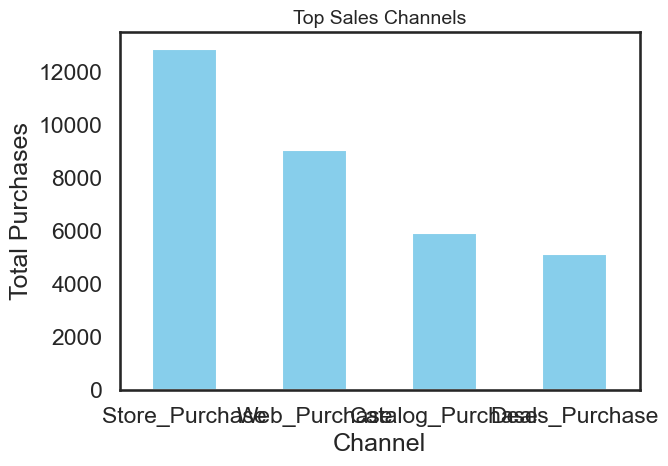

In [205]:
# Plot bar chart
plt.figure(figsize=(7,5))
channel_totals.plot(kind='bar', color='skyblue')
plt.title('Top Sales Channels', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Note:** 

The bar chart shows that in-store purchases dominate total transactions, followed by web purchases, while catalog and deals channels contribute the least. This highlights that physical stores remain the primary shopping touchpoint for Sunrise customers.

The strong performance of in-store and online channels reflects customers’ preference for direct and digital shopping experiences, while the lower performance of catalog and deals may indicate limited engagement or outdated channels.

In [98]:
# Spending columns
spending_cols = ['Wine', 'Meat', 'Fruit', 'Fish', 'Sweet', 'Gold']

# Make sure all are numeric
df[spending_cols] = df[spending_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Crosstab-style using groupby
spending_crosstab = df.groupby('Dominant_Channel')[spending_cols].sum()
print(spending_crosstab)


                    Wine    Meat  Fruit   Fish  Sweet   Gold
Dominant_Channel                                            
Catalog            81497   62752   8144  12185   7472  11410
Store             467268  258434  42112  59245  43236  66253
Web               127318   48877   8149  11975   9188  19764


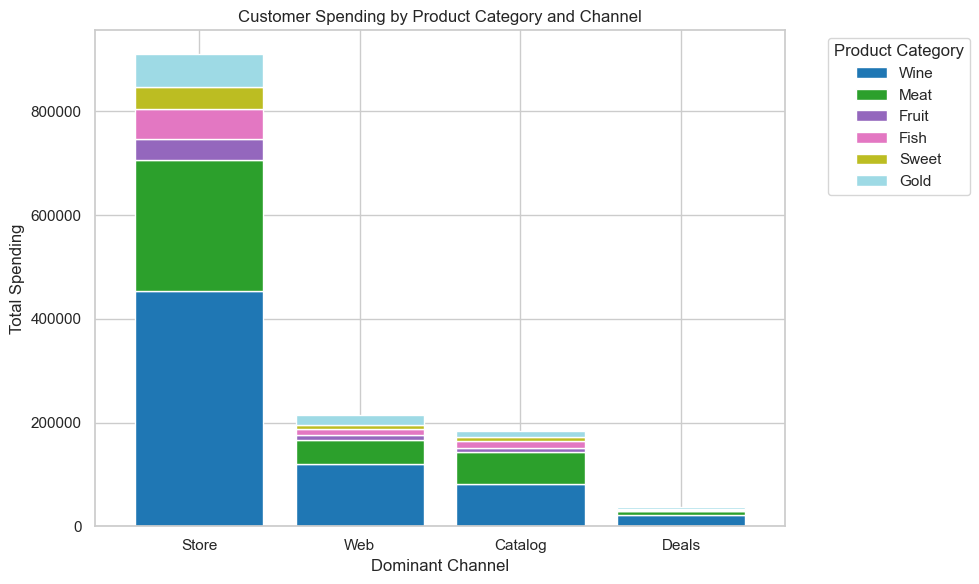

In [ ]:
# Spending category columns
spending_cols = ['Wine', 'Meat', 'Fruit', 'Fish', 'Sweet', 'Gold']

# make sure numeric
df[spending_cols] = df[spending_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group by Dominant_Channel and sum the spending
spending_by_channel = df.groupby('Dominant_Channel')[spending_cols].sum()

# Optional: order channel
order = [c for c in ['Store', 'Web', 'Catalog', 'Deals'] if c in spending_by_channel.index]
if order:
    spending_by_channel = spending_by_channel.reindex(order)

# Plot stacked bar chart
ax = spending_by_channel.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20',  
    width=0.8
)

plt.title('Customer Spending by Product Category and Channel')
plt.xlabel('Dominant Channel')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Note**: 

The stacked bar chart shows a clear dominance of in-store spending, with Wine and Meat contributing the largest share across all channels. Web purchases follow in second place but remain notably lower than in-store, while Catalog and Deals channels contribute the least to total spending.

Across all channels, premium product categories like Wine and Gold consistently drive the highest spending, reinforcing their role as key revenue drivers. Lighter categories like Fruit, Fish, and Sweet contribute smaller portions, indicating they play a complementary rather than primary role in transactions.

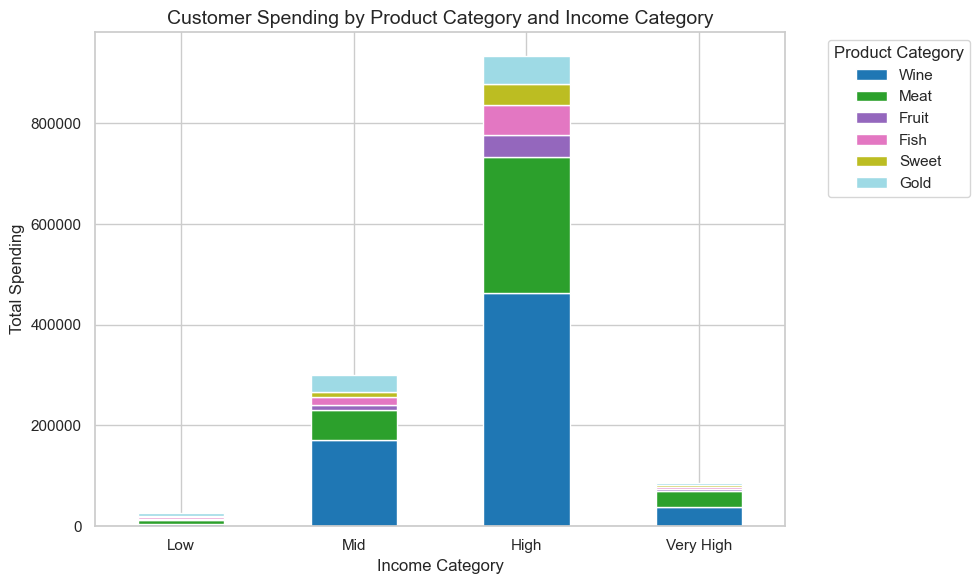

In [112]:
# Define product columns
product_cols = ['Wine', 'Meat', 'Fruit', 'Fish', 'Sweet', 'Gold']

# Group by income category and sum spending
spending_by_income = df.groupby('Income_Category')[product_cols].sum()

# Plot stacked bar chart
spending_by_income.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.title('Customer Spending by Product Category and Income Category', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Note:**

* Higher-income segments allocate more spending to premium categories, particularly Wine and Gold, making these the biggest revenue drivers in those groups.
* Meat remains a strong performer across all segments, indicating it’s a staple category with broad appeal.

* Lower-income groups show more balanced spending across multiple categories, with less concentration in premium products.

* Categories like Fruit, Fish, and Sweet contribute smaller portions overall, functioning more as complementary or add-on purchases.

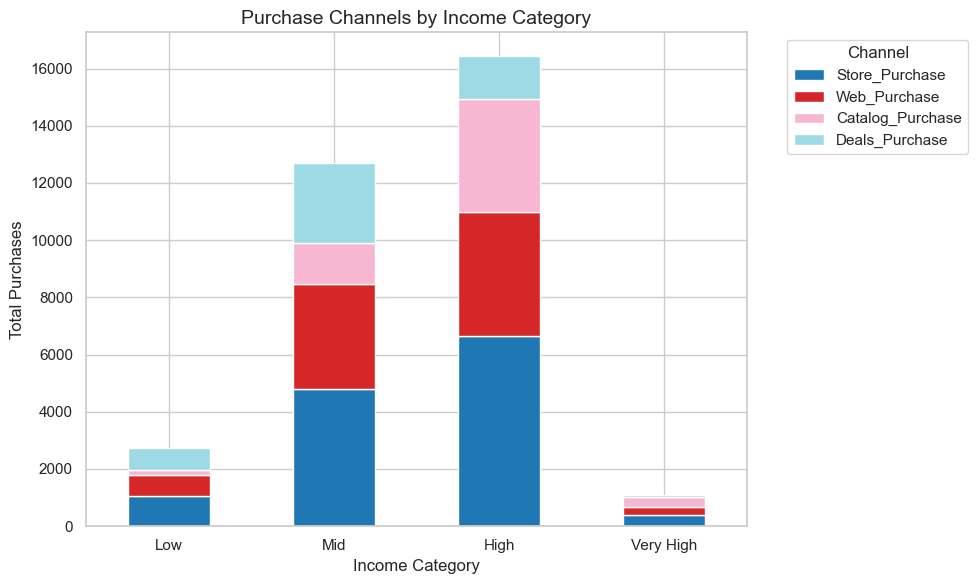

In [113]:
# Define purchase channel columns
channel_cols = ['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase', 'Deals_Purchase']

# Group by Income Category and sum purchases per channel
channel_by_income = df.groupby('Income_Category')[channel_cols].sum()

# Plot stacked bar chart
channel_by_income.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.title('Purchase Channels by Income Category', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Note:**

While Store purchases remain dominant overall, the chart reveals a notable pattern among lower-income customers. This group shows a higher tendency to use the Deals channel compared to higher income segments.

This suggests that promotional pricing and discounts play a bigger role in influencing purchase behavior for lower-income customers. In contrast, higher-income segments rely more on Store and Web channels, indicating they may be less price sensitive and more convenience-driven.

In [ ]:

df['Complain'] = pd.to_numeric(df['Complain'], errors='coerce').fillna(0).astype(int)

# Total complain & rate
total_customers   = len(df)
total_complaints  = df['Complain'].sum()
complaint_rate    = (total_complaints / total_customers) * 100

print(f"Total customers     : {total_customers}")
print(f"Total complaints    : {total_complaints}")
print(f"Complaint rate      : {complaint_rate:.2f}%")



Total customers     : 2216
Total complaints    : 21
Complaint rate      : 0.95%


In [ ]:
# Complain per channel 
if 'Dominant_Channel' in df.columns:
    per_channel = (
        df.groupby('Dominant_Channel')['Complain']
          .agg(total_complaints='sum', customers='count')
          .assign(complaint_rate=lambda x: (x['total_complaints'] / x['customers'] * 100).round(2))
          .sort_values('complaint_rate', ascending=False)
    )
    print("\nComplaints by Dominant_Channel:")
    print(per_channel)


Complaints by Dominant_Channel:
                  total_complaints  customers  complaint_rate
Dominant_Channel                                             
Store                           18       1666            1.08
Web                              3        305            0.98
Catalog                          0        133            0.00
Deals                            0        112            0.00


## 5.4 LRFM Analysis

LRFM stands for:

L – Length: How long a customer has been active or connected with the company.

R – Recency: How recently the customer made their last purchase.

F – Frequency: How often the customer makes purchases within a specific time period.

M – Monetary: How much money the customer spends overall.

This method is an extended version of the classic RFM model, with “Length” added to measure customer loyalty over time. It gives a more holistic view of customer behavior.

LRFM provides a more comprehensive way to segment customers by looking at how long they’ve been with the brand (Length), how recently they’ve purchased (Recency), how often they buy (Frequency), and how much they spend (Monetary). This helps businesses clearly identify high-value loyal customers, new customers with growth potential, and at-risk customers who may need reactivation. By understanding where each segment stands in its lifecycle, marketing and sales efforts can be prioritized more effectively.

Additionally, LRFM supports personalized and targeted campaigns instead of broad, one-size-fits-all approaches. Focusing on high-value segments can boost retention and increase lifetime value, while specific strategies for new or at-risk customers help maximize impact. Ultimately, LRFM provides the data foundation for smarter, more efficient business decisions.

### `Length`

In [119]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Living_Status', 'Income',
       'Dt_Customer', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish', 'Sweet',
       'Gold', 'Deals_Purchase', 'Web_Purchase', 'Catalog_Purchase',
       'Store_Purchase', 'Web_Visit_Month', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Latest_Campaign',
       'Age', 'Age_Group', 'Dependents', 'Parental_Status', 'Family_Size',
       'Total_Spent', 'Total_Purchase', 'Accepted_Canmpaign',
       'Income_Category', 'Length', 'Frequency', 'Monetary'],
      dtype='object')

In [120]:
df['Dt_Customer'] = pd.to_datetime(
    df['Dt_Customer'],
    format='%d-%m-%Y',
    errors='coerce'   
)

#### Next, the today's date will be set as if on 01/01/2015

In [121]:
# Use a fixed date as "today"
today = pd.to_datetime('2015-01-01')

# Calculate the length (in days) between the join date and this fixed date
df['Length'] = (today - df['Dt_Customer']).dt.days

# Check the result
print(df[['Dt_Customer', 'Length']].head())

     Dt_Customer  Length
1958  2013-10-05     453
1661  2013-02-12     688
809   2014-06-15     200
1639  2013-05-28     583
797   2013-10-16     442


#### `Recency`

In [122]:
print(df[['Recency', 'Length']].sample(10))

      Recency  Length
535        47     340
1515       41     201
239        59     472
1942       48     239
1977       86     624
770         8     288
1584       26     827
1263        4     381
78         18     310
1677       70     731


#### `Frequency` & `Monetary`

In [123]:
df['Frequency'] = df['Total_Purchase']
df['Monetary'] = df['Total_Spent']
print(df[['Length','Recency', 'Frequency', 'Monetary']].sample(10))

      Length  Recency  Frequency  Monetary
851      380       61         11       369
763      489       64          6        93
598      532       90         11       266
1895     809       85         23      1564
1815     683       72         23       929
462      682       40         22       973
1920     773       62         21       775
2053     473       51          4        37
1092     412       78         20      1323
834      738       60         20       764


### `2. Assigning Scores`

Selanjutnya kita akan menentukan skor dengan metode berikut:
- Rule Based: *Frequency*
- Statistical Approach: *Length, Recency,* dan *Monetary*

In [124]:
df_customer = df.groupby('ID').agg({
    'Length': 'max',            
    'Recency': 'min',           
    'Frequency': 'sum',    
    'Monetary': 'sum'         
}).reset_index()

df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary
948,4741,336,17,17,562
218,1087,589,30,7,173
1080,5316,546,89,6,84
414,2134,867,94,18,694
1633,8254,628,48,3,23


**Length Segmentation**

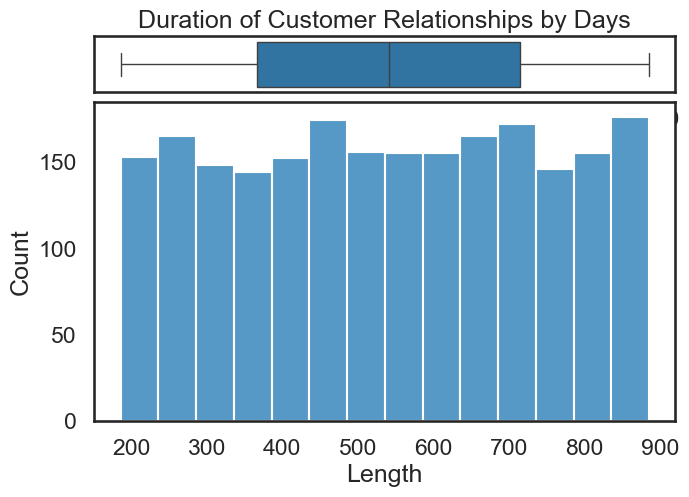

0.00    186.0
0.25    366.0
0.50    541.5
0.75    715.0
1.00    885.0
Name: Length, dtype: float64

In [125]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='Length', ax=ax_top)
sns.histplot(data=df_customer, x='Length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()
display(df_customer['Length'].quantile([0, 0.25, 0.5, 0.75, 1]))

Since the dataset covers customer activity from 2012 to 2014, most customers have been registered for quite a long time.

Customers are segmented into four categories:
- 4 (Veteran): joined more than 715 days ago
- 3 (Established): joined between 541 and 715 days ago
- 2 (Acquainted): joined between 366 and 541 days ago
- 1 (Newcomer): joined between 1 and 366 days ago

In [ ]:
df_customer['L_Score'] = pd.qcut(
    df_customer['Length'],              # data
    q=4,                                # ddivided bu 4 category
    labels=[1, 2, 3, 4]                 # the more longer the higher the score
).astype(int)

df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score
948,4741,336,17,17,562,1
218,1087,589,30,7,173,3
1080,5316,546,89,6,84,3
414,2134,867,94,18,694,4
1633,8254,628,48,3,23,3


**Recency Segmentation**

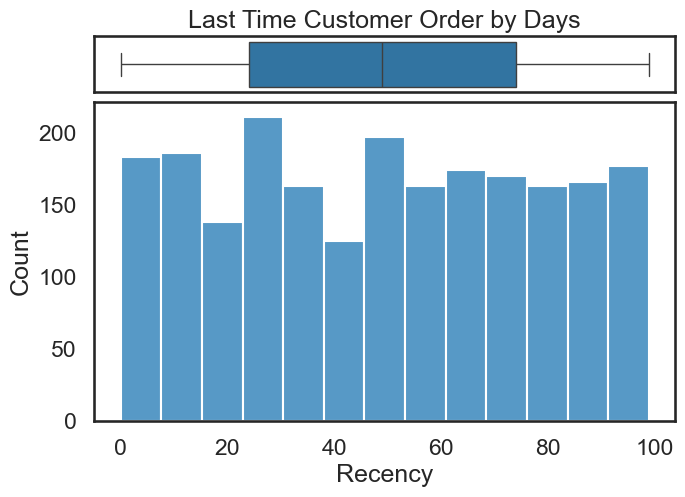

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: Recency, dtype: float64

In [127]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='Recency', ax=ax_top)
sns.histplot(data=df_customer, x='Recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_customer['Recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Based on the distribution above, customers will be grouped according to their recency into four categories:

- 4 (Active): made a transaction within the last 24 days
- 3 (Warm): made a transaction between 24 and 49 days ago
- 2 (Cold): made a transaction between 49 and 74 days ago
- 1 (Inactive): made a transaction more than 74 days ago

In [ ]:
df_customer['R_Score'] = pd.qcut(
    df_customer['Recency'],             # data
    q=4,                                # divided by 4 category
    labels=[4, 3, 2, 1]                 # lower recency higher the score
).astype(int)

df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score,R_Score
948,4741,336,17,17,562,1,4
218,1087,589,30,7,173,3,3
1080,5316,546,89,6,84,3,1
414,2134,867,94,18,694,4,1
1633,8254,628,48,3,23,3,3


**Frequency Segmentation**

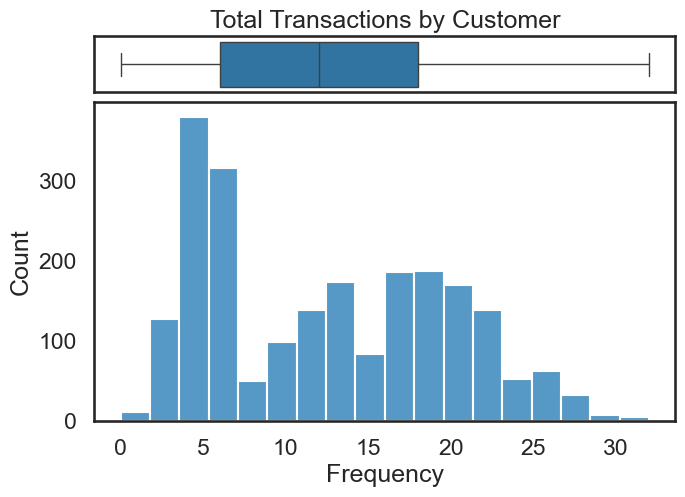

0.00     0.0
0.25     6.0
0.50    12.0
0.75    18.0
1.00    32.0
Name: Frequency, dtype: float64

In [129]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='Frequency', ax=ax_top)
sns.histplot(data=df_customer, x='Frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['Frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Based on the distribution above, customers will be grouped according to their frequency into four categories, referring to the defined number of transactions:

- 4 (Loyal): made more than 18 transactions
- 3 (High): made between 12 and 18 transactions
- 2 (Medium): made between 6 and 12 transactions
- 1 (Low): made 6 transactions

In [ ]:
df_customer['F_Score'] = pd.qcut(
     df_customer['Frequency'],  # data frequency
     q=4,                       # divided by 4 category
     labels=[1, 2, 3, 4]        # higher purchase, higher frequency
 ).astype(int)
df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score
948,4741,336,17,17,562,1,4,3
218,1087,589,30,7,173,3,3,2
1080,5316,546,89,6,84,3,1,1
414,2134,867,94,18,694,4,1,3
1633,8254,628,48,3,23,3,3,1


**Monetary Segmentation**

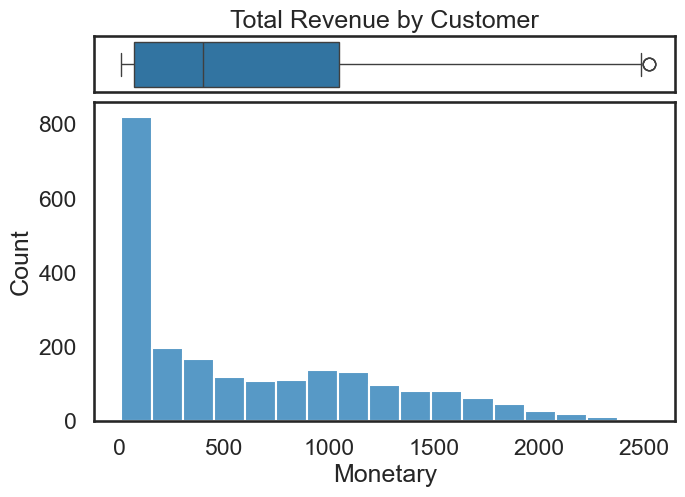

0.00       5.0
0.25      69.0
0.50     396.5
0.75    1048.0
1.00    2525.0
Name: Monetary, dtype: float64

In [131]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='Monetary', ax=ax_top)
sns.histplot(data=df_customer, x='Monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['Monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Based on the distribution above, customers will be grouped according to their monetary value into four categories:

- 4 (Top Spender): spent more than $1,048.0
- 3 (High Spender): spent between $396.5 and $1,048.0
- 2 (Medium Spender): spent between $69.0 and $396.5
- 1 (Low Spender): spent less than $69.0

In [ ]:
df_customer['M_Score'] = pd.qcut(
    df_customer['Monetary'],            
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score
948,4741,336,17,17,562,1,4,3,3
218,1087,589,30,7,173,3,3,2,2
1080,5316,546,89,6,84,3,1,1,2
414,2134,867,94,18,694,4,1,3,3
1633,8254,628,48,3,23,3,3,1,1


### `3. Labelling Segment`

Selanjutnya kita akan melakukan customer segmentation dengan Total Score Approach


**a. Total Score Approach**

Pada tahapan ini kita akan menjumlahkan l_score, r_score, f_score, dan m_score menjadi rfm_score_total

In [133]:
df_customer['LRFM_Score_Total'] = df_customer['L_Score'] + df_customer['R_Score'] + df_customer['F_Score'] + df_customer['M_Score']
df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score,LRFM_Score_Total
948,4741,336,17,17,562,1,4,3,3,11
218,1087,589,30,7,173,3,3,2,2,10
1080,5316,546,89,6,84,3,1,1,2,7
414,2134,867,94,18,694,4,1,3,3,11
1633,8254,628,48,3,23,3,3,1,1,8


Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [134]:
df_customer['LRFM_Score_Total'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00     4.0
0.25     8.0
0.50    10.0
0.75    12.0
1.00    16.0
Name: LRFM_Score_Total, dtype: float64

In [135]:
def segmentation_by_total(x):
    if x <= 8:
        return 'Bronze'
    elif x <= 10:
        return 'Silver'
    elif x <= 12:
        return 'Gold'
    else:
        return 'Platinum'

df_customer['LRFM_Segment_Total'] = df_customer['LRFM_Score_Total'].apply(segmentation_by_total)
df_customer.sample(5, random_state=42)

,ID,Length,Recency,Frequency,Monetary,L_Score,R_Score,F_Score,M_Score,LRFM_Score_Total,LRFM_Segment_Total
948,4741,336,17,17,562,1,4,3,3,11,Gold
218,1087,589,30,7,173,3,3,2,2,10,Silver
1080,5316,546,89,6,84,3,1,1,2,7,Bronze
414,2134,867,94,18,694,4,1,3,3,11,Gold
1633,8254,628,48,3,23,3,3,1,1,8,Bronze


In [137]:
df_customer.columns

Index(['ID', 'Length', 'Recency', 'Frequency', 'Monetary', 'L_Score',
       'R_Score', 'F_Score', 'M_Score', 'LRFM_Score_Total',
       'LRFM_Segment_Total'],
      dtype='object')

Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

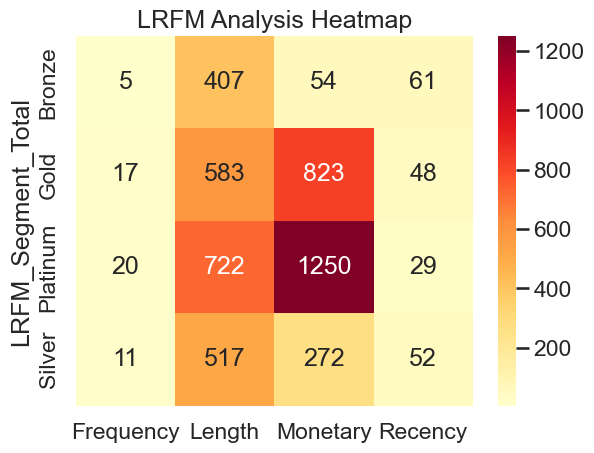

In [108]:
lrfm_heatmap = df_customer.pivot_table(index='LRFM_Segment_Total', values=['Length', 'Recency', 'Frequency', 'Monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('LRFM Analysis Heatmap')
plt.show()
 

In [77]:
import plotly.express as px

color_map = {'Bronze' : 'brown', 'Silver' : 'gray', 'Gold' : 'orange', 'Platinum' : 'red'}

fig = px.scatter_3d(
    df_customer,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='LRFM_Segment_Total',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

**Summary:**
The Platinum cluster is concentrated where Recency is low and both Frequency and Monetary are high. These are the best customers — recent, frequent, and high spenders.
The Gold cluster tends to consist of customers who are either recent and high spenders or frequent buyers with slightly less recent activity, indicating they’re valuable and likely to respond well to premium or loyalty programs.
The Silver cluster shows medium Frequency and Monetary values, with Recency not always recent — making this group a good base for reactivation or engagement strategies, such as bundles or reminders.
The Bronze cluster is positioned where Recency is high (inactive) and Frequency/Monetary are low. This segment is at high churn risk and is best suited for low-cost win-back and awareness campaigns.

It is observed that most recent purchases come from Platinum customers, while Bronze customers show a clear trend toward inactivity. Gold customers display a more even trend across R, F, and M.
Since buying intent is often driven by high income, high spend, and high purchase frequency, Platinum customers represent the core target group for retention and value maximization.
In contrast, Bronze customers should be reactivated through strategic incentives — for example, discounts via web or in-store purchases, or loyalty programs such as stamp collection with reward discounts.

In [191]:
product_cols = ['Wine', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruit']

df_merged_prod = df_customer.merge(
    df[['ID'] + product_cols],
    on='ID',
    how='left'
)

# Make sure values are numeric
df_merged_prod[product_cols] = df_merged_prod[product_cols].apply(pd.to_numeric, errors='coerce').fillna(0)


In [194]:
# Use sum if you want total spending, or median if you prefer typical spending
prod_spending = df_merged_prod.groupby('LRFM_Segment_Total')[product_cols].median()
prod_spending


,Wine,Meat,Gold,Fish,Sweet,Fruit
LRFM_Segment_Total,,,,,,
Bronze,18.0,12.0,8.0,3.0,2.0,2.0
Gold,390.0,151.0,46.0,37.0,23.0,21.0
Platinum,620.0,279.0,57.0,52.0,37.0,36.0
Silver,140.0,54.0,23.0,11.0,8.0,7.0


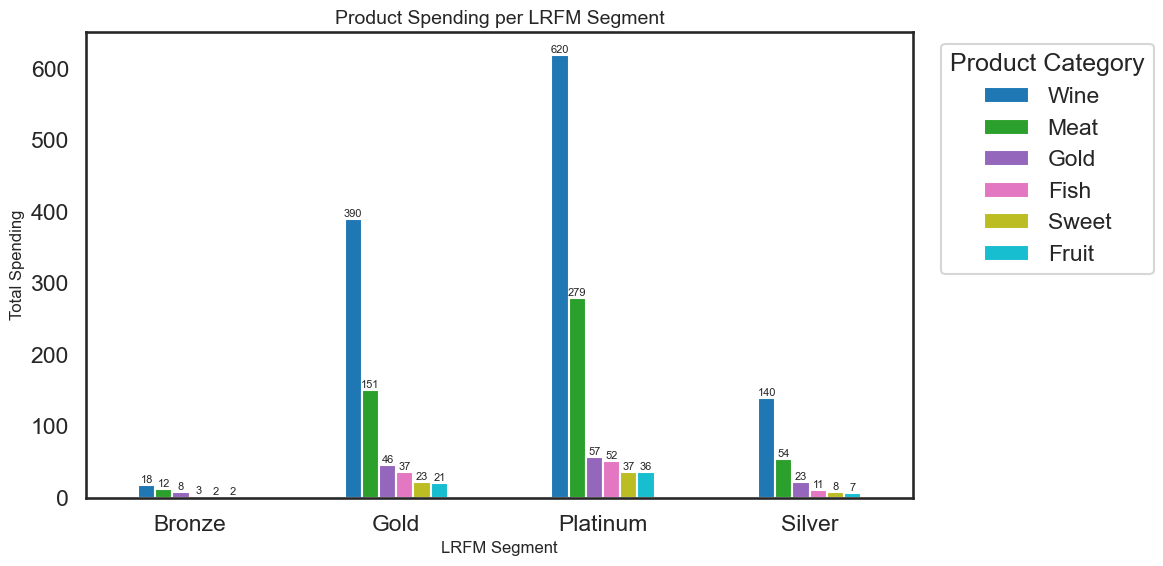

In [ ]:
ax = prod_spending.plot(
    kind='bar',
    stacked=False,
    figsize=(12,6),
    colormap='tab10'
)

plt.title('Product Spending per LRFM Segment', fontsize=14)
plt.xlabel('LRFM Segment', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add spending labels on top of each bar
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(f'{h:,.0f}',    
                    (p.get_x() + p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# merge: LRFM segment + Dominant_Channel
df_merged_channel = df_customer.merge(
    df[['ID', 'Dominant_Channel']],
    on='ID',
    how='left'
)

order_channels = ['Store', 'Web', 'Catalog', 'Deals']
ct_counts = pd.crosstab(
    index=df_merged_channel['LRFM_Segment_Total'],
    columns=df_merged_channel['Dominant_Channel']
).reindex(columns=[c for c in order_channels if c in df_merged_channel['Dominant_Channel'].unique()],
          fill_value=0)

ct_counts

Dominant_Channel,Store,Web,Catalog,Deals
LRFM_Segment_Total,,,,
Bronze,658,39,4,36
Gold,347,103,50,25
Platinum,309,90,55,15
Silver,352,73,24,36


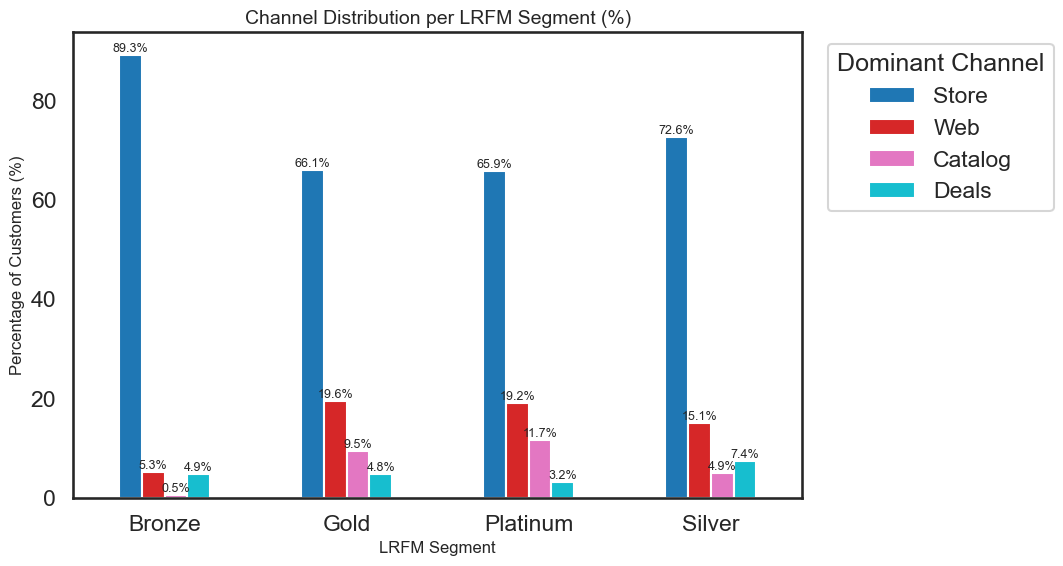

In [ ]:
ct_pct = (ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100)

ax = ct_pct.plot(
    kind='bar',
    stacked=False,
    figsize=(11,6),
    colormap='tab10'
)

plt.title('Channel Distribution per LRFM Segment (%)', fontsize=14)
plt.xlabel('LRFM Segment', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.xticks(rotation=0)


plt.legend(title='Dominant Channel', bbox_to_anchor=(1.02, 1), loc='upper left')


for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(f'{h:.1f}%',
                    (p.get_x() + p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 6. Conclusion & Recommendation

## Conclusion
- In summary, by aligning the efforts of the marketing team, store managers, and customer service, Sunrise can build a stronger and more holistic customer experience strategy. This approach not only maximizes revenue potential through targeted campaigns and improved in-store engagement, but also strengthens customer loyalty, supports sustainable growth, and positions Sunrise as a customer-centric modern supermarket.

- Moreover, by leveraging a CRM-driven approach, the company can make more data-informed and holistic decisions. Centralizing customer information across marketing, sales, and service functions enables Sunrise to identify behavioral patterns, personalize campaigns more effectively, and respond to customer needs with greater precision. This integrated strategy creates a seamless ecosystem where insights turn into actionable strategies, ensuring long-term competitive advantage and stronger customer relationships.



## Recommendation
### For the Marketing Team
- Sunrise’s sales performance shows that high-value products such as Wine, Meat, and Gold play a major role in driving overall spending. This creates a strong opportunity for event-driven and experience-based marketing strategies. Marketing teams can design themed promotions—such as “Family BBQ Nights” featuring wine and meat bundles or “Couple Celebration Packages” for Valentine’s or anniversaries combining wine, gold, and sweets—to encourage larger basket sizes and stimulate repeat purchases.
- In addition, improving in-store product display and curation can enhance customer experience and trigger more impulse buying among Silver and Gold segment customers. For online channels, curating bundled products within the catalog can make shopping more seamless, personalized, and appealing.
- To support product diversification, Sunrise can also introduce green campaigns in partnership with local organic farms to promote organic fruits. This not only aligns with global wellness and sustainability trends but also attracts a segment of customers who value health and eco-friendly living. Finally, to re-engage inactive online customers, marketing can deploy strategic promotional events like payday sales or Black Friday-style campaigns, aiming to increase web traffic, conversion rates, and overall customer activity.

### For Store Managers

- Although the complaint rate remains relatively low, most issues come from in-store experiences, highlighting the critical role of store operations. Store managers should ensure that staff are trained to be proactive, attentive, and responsive, especially during peak hours or promotional events. Creating a more personalized and enjoyable shopping atmosphere can help maintain high satisfaction levels and strengthen customer trust in the brand.
- Additionally, integrating in-store promotions with marketing efforts—such as on-the-spot cross-selling suggestions or themed product corners—can enhance the impact of campaigns and encourage customers to explore more product categories during their visits.

### For Customer Service Teams

- Customer service plays a key role in sustaining the current low complaint levels and turning good experiences into loyalty-building opportunities. By ensuring quick, empathetic, and solution-oriented responses, the CS team can help reinforce brand trust. Proactive strategies such as post-purchase follow-ups, satisfaction check-ins, or exclusive loyalty messages can deepen engagement and encourage repeat transactions.
- In the long term, customer service can collaborate closely with marketing and store teams to identify early signals of churn or dissatisfaction and address them before they escalate. This integrated approach ensures that every customer touchpoint—online or offline—delivers a consistent and satisfying experience.